In [26]:
from scipy.fftpack import fft, ifft
from scipy import signal
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.rcParams["figure.dpi"] = 400

In [27]:
fs = 360

def trap_filter(wave, fs):
    b, a = signal.iirnotch(w0=50, Q=30, fs=fs)
    filtered_wave = signal.filtfilt(b, a, wave)

    return filtered_wave

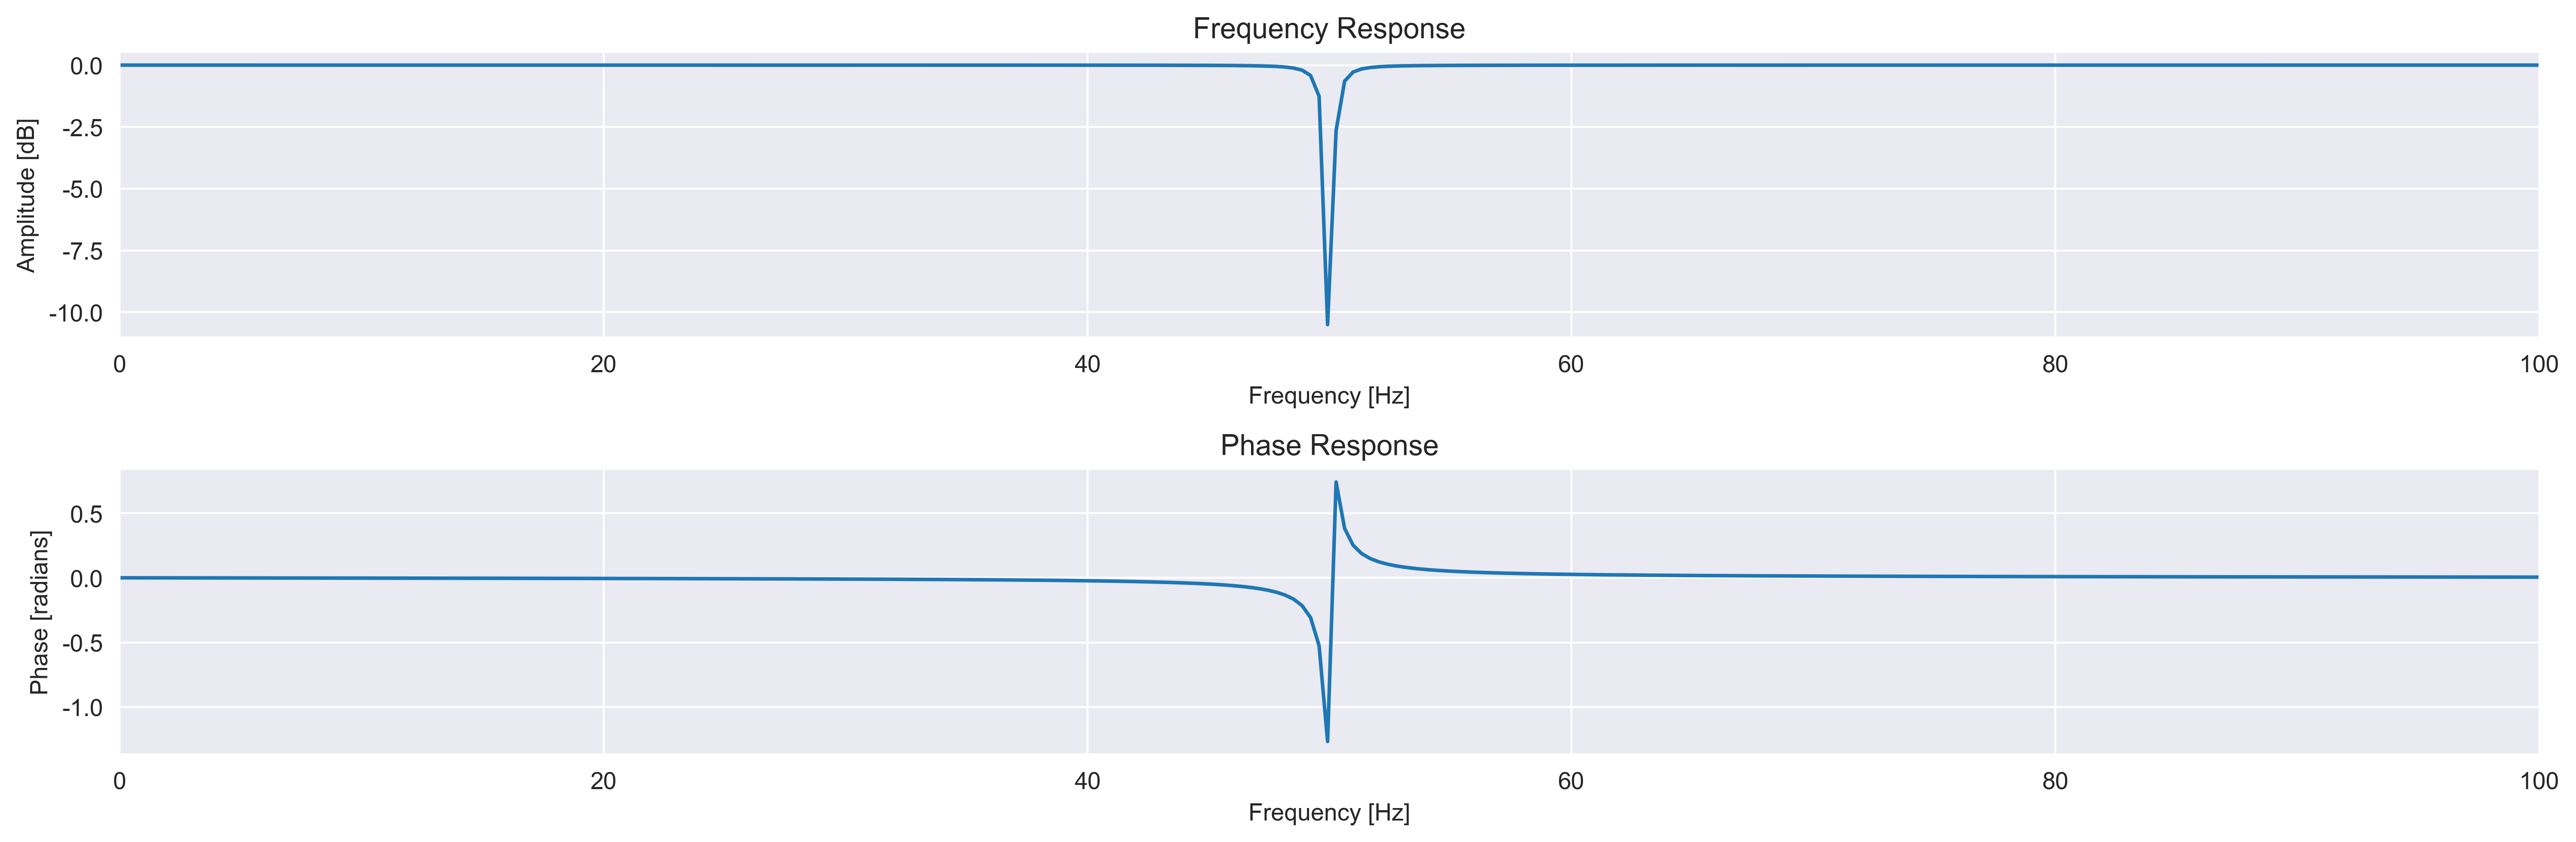

In [28]:
b, a = signal.iirnotch(w0=50, Q=100, fs=fs)
w, h = signal.freqz(b, a, fs=fs)

fig, axes = plt.subplots(2, 1, figsize=(15, 5))
axes[0].plot(w, 20 * np.log10(abs(h)))
axes[0].set_title('Frequency Response')
axes[0].set_ylabel('Amplitude [dB]')
axes[0].set_xlabel('Frequency [Hz]')
axes[0].set_xlim([0, 100])

axes[1].plot(w, np.angle(h))
axes[1].set_title('Phase Response')
axes[1].set_ylabel('Phase [radians]')
axes[1].set_xlabel('Frequency [Hz]')
axes[1].set_xlim([0, 100])

plt.tight_layout()

(0.0, 180.0)

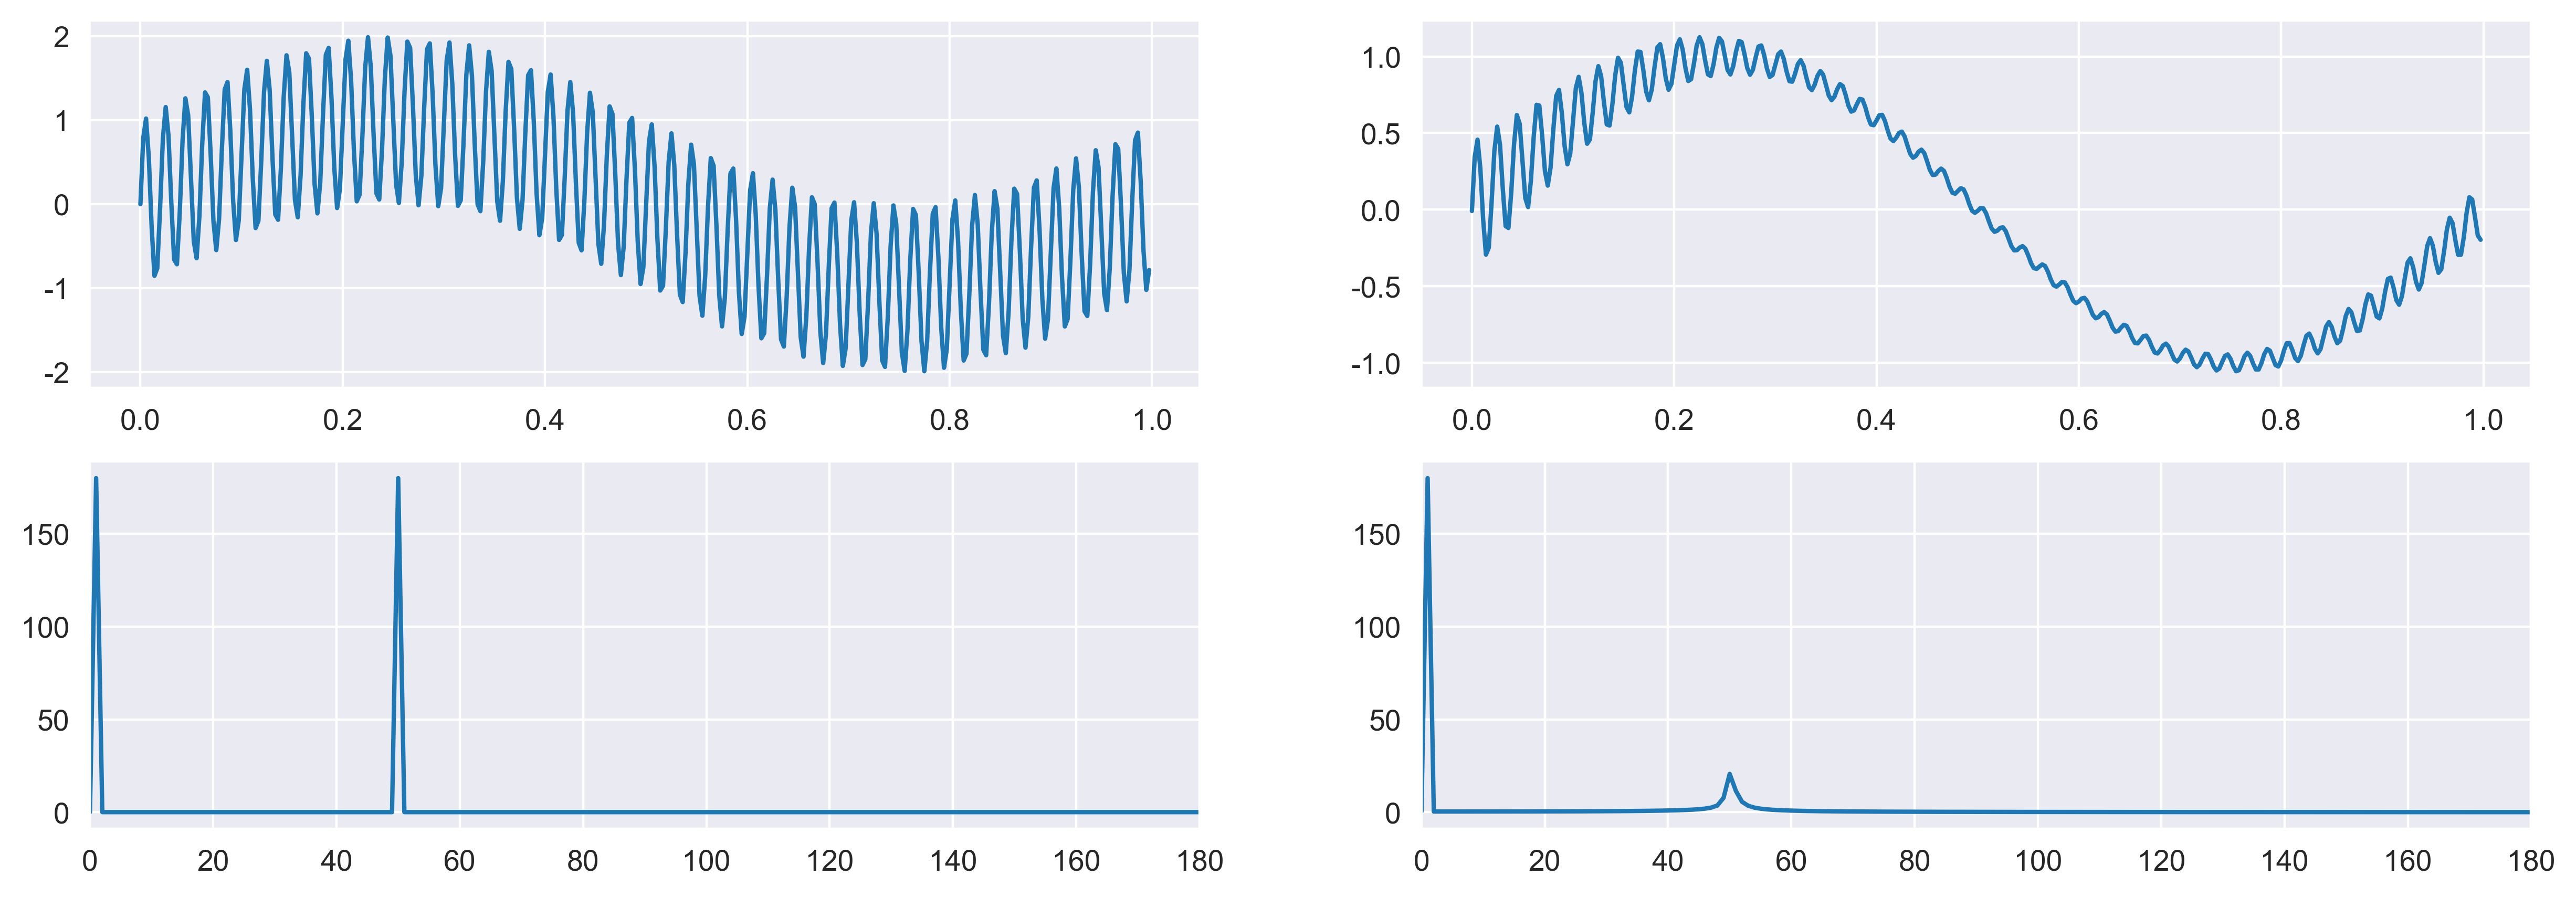

In [29]:
from scipy.fftpack import fft
fig, axes = plt.subplots(2, 2, figsize=(15, 5))
x = np.arange(0, 1, 1/fs)

noise = np.sin(2 * np.pi * 50 * x)
sin_wave = np.sin(2 * np.pi * 1 * x)

mix_wave = np.add(noise, sin_wave)
axes[0, 0].plot(x, mix_wave)

filtered_wave = trap_filter(mix_wave, fs)
axes[0, 1].plot(x, filtered_wave)

axes[1, 0].plot(np.abs(fft(mix_wave)))
axes[1, 1].plot(np.abs(fft(filtered_wave)))

axes[1, 0].set_xlim([0, 180])
axes[1, 1].set_xlim([0, 180])



Text(0.5, 1.0, 'Detrended Wave')

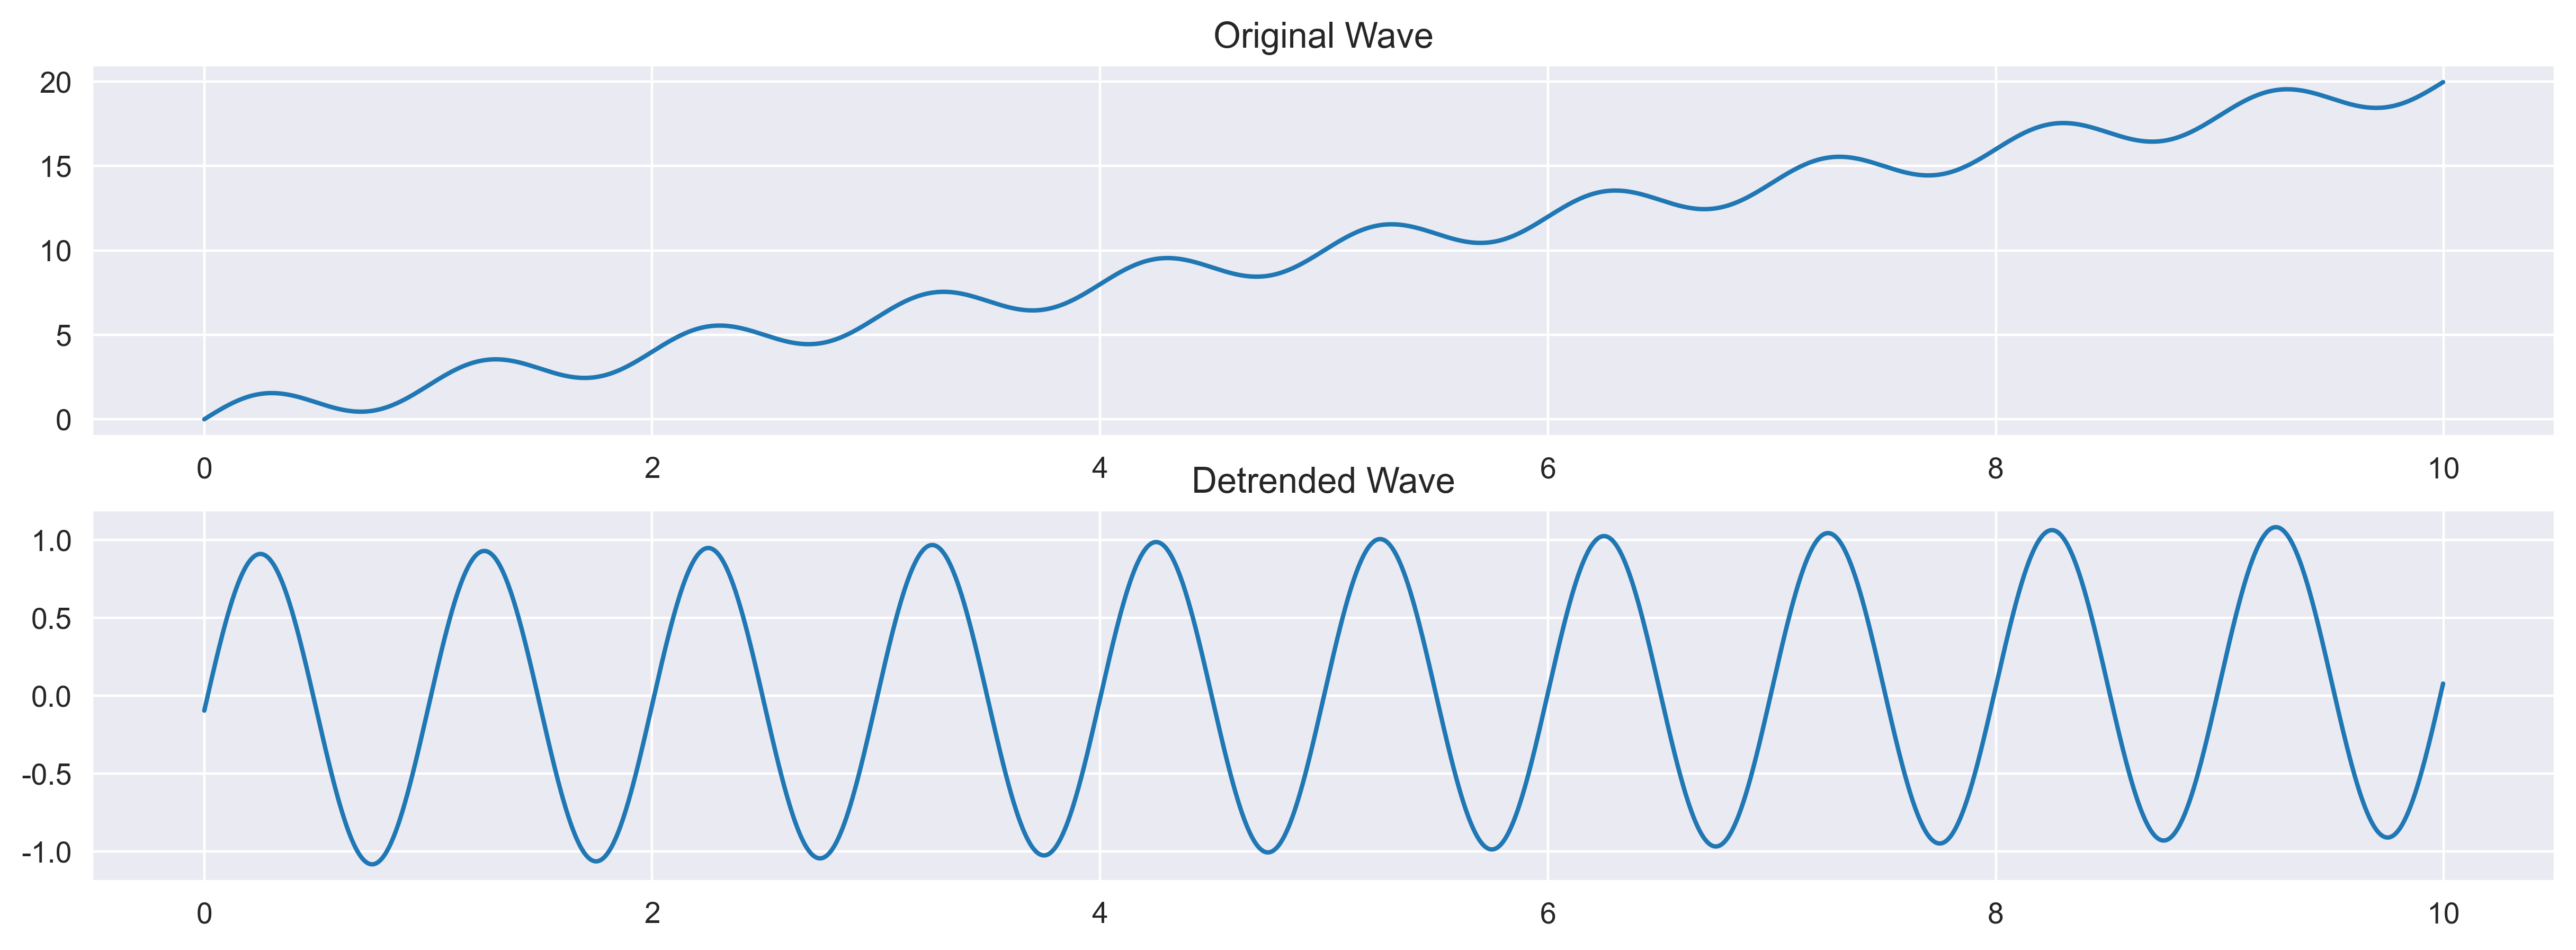

In [30]:
fig, axes = plt.subplots(2, 1, figsize=(15, 5))
x = np.arange(0, 10, 1/fs)


def detrend_wave(wave):
    return signal.detrend(wave)

original_wave = np.sin(2 * np.pi * 1 * x)
linear_wave = 2 * x

trend_wave = np.add(original_wave, linear_wave)

axes[0].plot(x, trend_wave)
axes[0].set_title('Original Wave')

detrended_wave = detrend_wave(trend_wave)
axes[1].plot(x, detrended_wave)
axes[1].set_title('Detrended Wave')